In [189]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl
import seaborn as sns 
import cmasher as cmr

In [190]:
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
#file="MAG2P_nbonded-2025-2-6-16:25:37.pickle"
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-2-14-19:59:9.pickle"

dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-3-4-18:34:52.pickle" 
df = pd.read_pickle(dir)

print(df["lambda"].unique())

eval_shifts = [0.0, 0.05, 0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5, 0.6, 0.65, 0.7]
mask = df['shift'].isin(eval_shifts)
df = df[mask]

eval_lambda = [1.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, 17.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0, 70.0,
 100.0]
mask = df['lambda'].isin(eval_lambda)
df = df[mask]


df = df.sort_values(["lambda","shift"])   
bonds = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
radius =  df.groupby(["lambda","shift"])[["mean_radius_of_gyration","std_radius_of_gyration"]].mean().reset_index()
size =  df.groupby(["lambda","shift"])[["mean_size", "std_size"]].mean().reset_index()
largest =  df.groupby(["lambda","shift"])[["largest"]].mean().reset_index()


[70.0 30.0 40.0 1.8 25.0 50.0 35.0 2.3 1.0 2.5 9.0 100.0 0.5 17.0 1.25 1.5
 10.0 8.0 3.0 20.0 7.0 6.0 12.0 4.0 2.0 1.75 1.9 0.75 3.5 5.0 15.0 4.5 2.1]


In [191]:
grouped = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
print(grouped)
print(df["shift"].unique())
print(df["lambda"].unique())


df.groupby(['lambda','shift']).size().reset_index().rename(columns={0:'count'})

     lambda  shift mean_bonds std_bonds
0       3.5   0.00    1.37825  0.654901
1       3.5   0.05    1.41775  0.654076
2       3.5   0.10    1.44225  0.646526
3       3.5   0.15     1.4505  0.642617
4       3.5   0.20      1.355  0.670237
..      ...    ...        ...       ...
232   100.0   0.45      1.914  0.858603
233   100.0   0.50    1.56925  0.735378
234   100.0   0.60     1.4175  0.596534
235   100.0   0.65     1.5185  0.566435
236   100.0   0.70    1.08375  0.623706

[237 rows x 4 columns]
[0.0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.6 0.7 0.65]
[3.5 6.0 7.0 8.0 9.0 10.0 12.0 15.0 17.0 20.0 25.0 30.0 35.0 40.0 50.0
 70.0 100.0]


,lambda,shift,count
0,3.5,0.00,8
1,3.5,0.05,8
2,3.5,0.10,8
3,3.5,0.15,8
4,3.5,0.20,8
...,...,...,...
232,100.0,0.45,8
233,100.0,0.50,8
234,100.0,0.60,8
235,100.0,0.65,8


In [192]:

def heatmap(df):

    
    shifts = df["shift"].unique()
    lambdas=  df["lambda"].unique()
    mpl.rc("legend", fontsize=50)

    arr = df.values.astype(float)
    arr = np.reshape(arr[:,2], (len(lambdas), len(shifts)))
    arr = np.round(arr, decimals=2)

    fig, ax = plt.subplots(figsize=(10,10))
    im = sns.heatmap(
        arr,
        ax=ax,
        linewidth=1,
        annot=False,
        cmap=cmr.chroma,
        cbar=False,
        linecolor="black"
    )
    im.invert_yaxis()
    new_xticks = shifts
    new_yticks = lambdas
    ax.set_xticks(
        np.arange(0, len(shifts)),
        new_xticks,
        rotation=45,
        horizontalalignment="right",
    )
    ax.set_yticks(
        np.arange(0, len(lambdas)),
        new_yticks,
        rotation=0,
        verticalalignment="bottom",
    )
    im.set_ylabel("$\lambda$", size=20)
    im.set_xlabel("shift s", size=20)
    im.set_yticks(np.arange(0, len(lambdas)), new_yticks)
    im.tick_params(axis="both", which="major", labelsize=15)
    plt.tight_layout()

    mappable = im.get_children()[0]
    #plt.colorbar(mappable, ax=axes, orientation="horizontal")
    plt.colorbar(mappable, ax=ax, orientation="horizontal")
    plt.tight_layout()
    plt.show()



In [193]:

heatmap(bonds)

ValueError: cannot reshape array of size 237 into shape (17,14)

In [ ]:
shifts = df["shift"].unique()
lambdas=  df["lambda"].unique()
arr = np.reshape(radius[:,2], (len(lambdas), len(shifts)))
arr = np.round(arr, decimals=2)
heatmap(arr)


InvalidIndexError: (slice(None, None, None), 2)

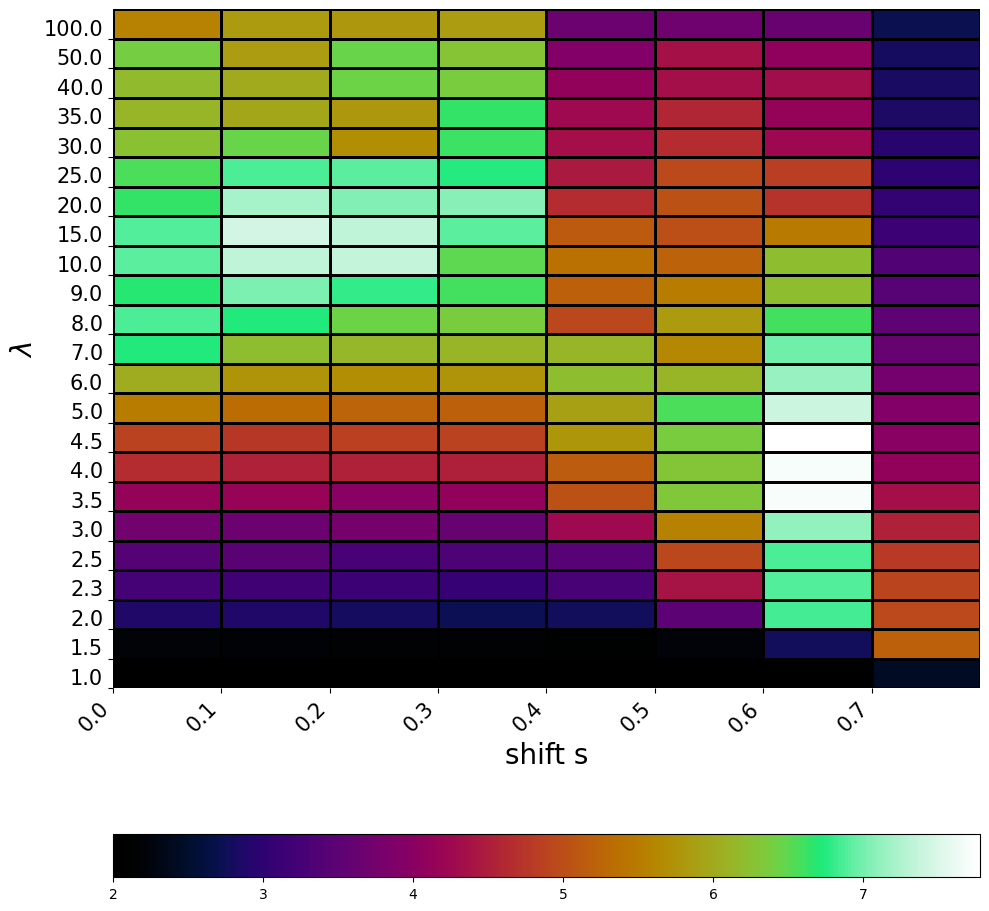

In [ ]:
shifts = df["shift"].unique()
lambdas=  df["lambda"].unique()
arr = np.reshape(size[:,2], (len(lambdas), len(shifts)))
arr = np.round(arr, decimals=2)
heatmap(arr)

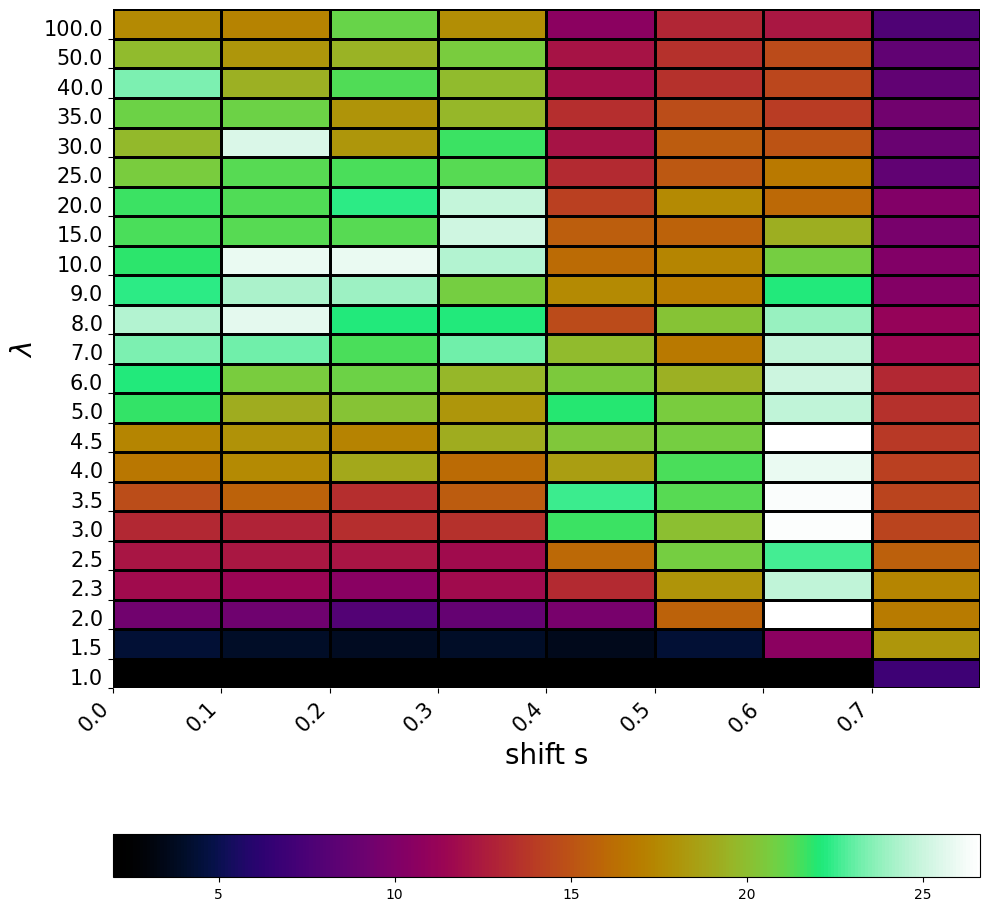

In [ ]:
shifts = df["shift"].unique()
lambdas=  df["lambda"].unique()
arr = np.reshape(largest[:,2], (len(lambdas), len(shifts)))
arr = np.round(arr, decimals=2)
heatmap(arr)